1. Import the Iris dataset form the link: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


2. Create a pairplot to visualize the similarities and especially difference between the species using seaborn

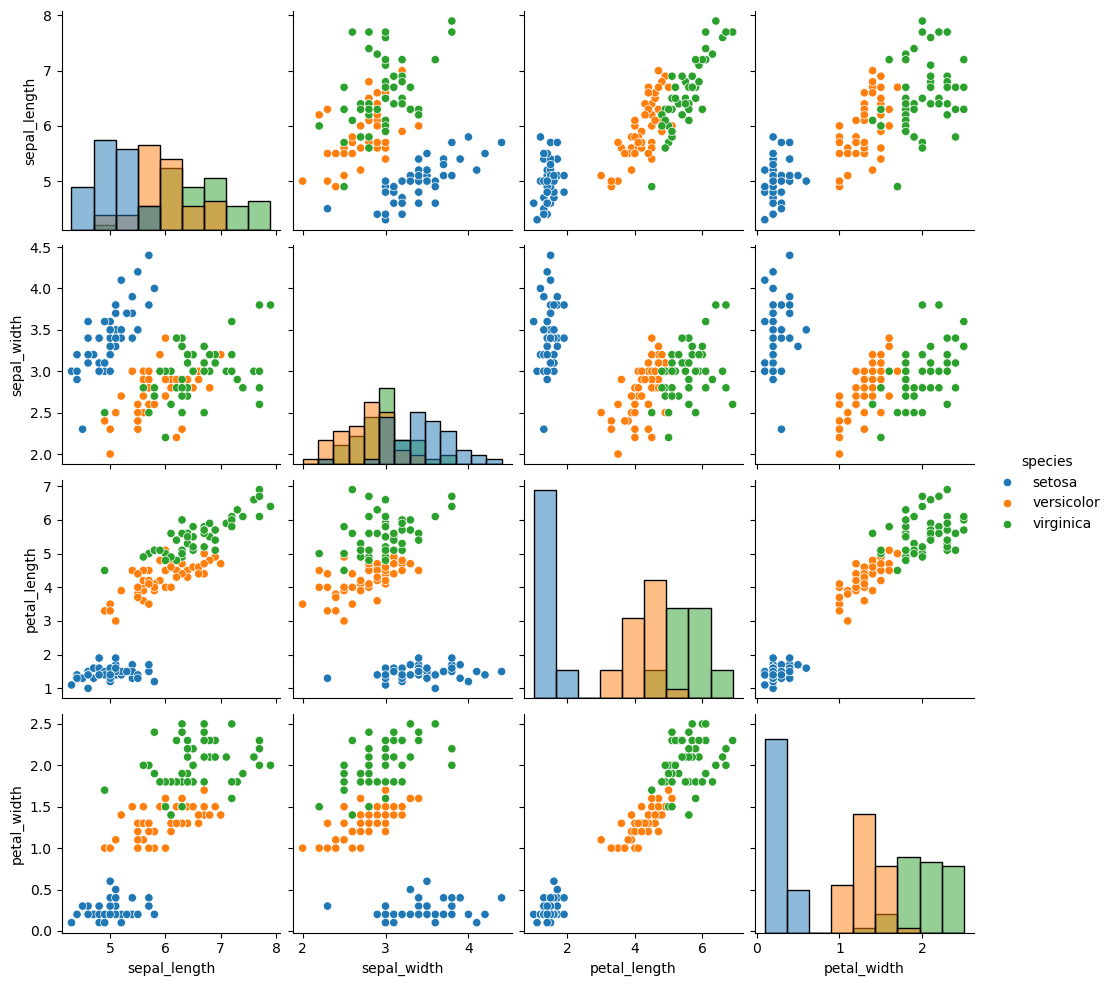

In [17]:
sns.pairplot(df, hue="species", diag_kind="hist")
plt.show()

3. Provide code to Check the dataset (eg: head, info, describe)

In [19]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


4. Separate the independent variables from dependent variables (ie: X, y)

In [23]:
X = df.drop(columns=["species"])
y = df["species"]

le = LabelEncoder()
y = le.fit_transform(y)

5. Split the dataset into train and test using sklearn train_test_split package

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

6. Run the following code to train an SVM classifier where x_train and y_train are obtained from (5)

In [27]:
from sklearn.svm import SVC
model=SVC()

In [28]:
model.fit(x_train, y_train)

SVC()

7. Run the following to perform prediction

In [30]:
y_pred=model.predict(x_test)

8. Provide code to find the Accuracy, Precision, Recall, F1-score

In [32]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy is {accuracy}")

Accuracy is 1.0


In [33]:
# precision, recall
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"precision score is: {precision}")
print(f"recall score is: {recall}")

precision score is: 1.0
recall score is: 1.0


In [34]:
f1 = f1_score(y_test, y_pred, average="macro")
print(f"f1 score is: {f1}")

f1 score is: 1.0


9. Provide code to show the report and confusion matrix

In [36]:
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=df.species.unique()))

📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



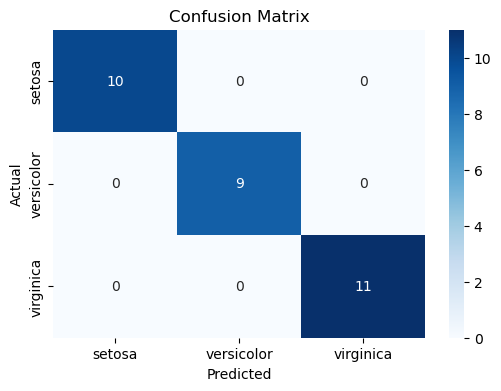

In [37]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df.species.unique(), yticklabels=df.species.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### with kernel as linear

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
linear_svc = SVC(kernel='linear')
linear_svc.kernel

'linear'

In [40]:
linear_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [41]:
y_pred=linear_svc.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy is {accuracy}")

precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"precision score is: {precision}")
print(f"recall score is: {recall}")

f1 = f1_score(y_test, y_pred, average="macro")
print(f"f1 score is: {f1}")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=df.species.unique()))

Accuracy is 1.0
precision score is: 1.0
recall score is: 1.0
f1 score is: 1.0
📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### with kernel as rbf

In [44]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

rbf_svc = SVC(kernel='rbf')
rbf_svc.kernel
rbf_svc.fit(x_train, y_train)

y_pred=rbf_svc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy is {accuracy}")

precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"precision score is: {precision}")
print(f"recall score is: {recall}")

f1 = f1_score(y_test, y_pred, average="macro")
print(f"f1 score is: {f1}")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=df.species.unique()))

Accuracy is 1.0
precision score is: 1.0
recall score is: 1.0
f1 score is: 1.0
📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

